In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtw import dtw,accelerated_dtw

plt.style.use('ggplot')

In [4]:
df = pd.read_csv('./data/new_dataset.csv', index_col='date', parse_dates=True)
df.head()

,mei,production,area_harvested,scaled_yield_idx
date,,,,
1961-12-31,-0.055583,12084000,6857000,-1.765177
1962-12-31,-0.615000,13004000,7283000,-1.744829
1963-12-31,0.354667,11595000,6731000,-1.799900
1964-12-31,-0.603167,12306000,6980000,-1.764520
1965-12-31,0.832333,12975000,7327000,-1.757682


In [6]:
d1 = df['mei'].values
d2 = df['scaled_yield_idx'].values

In [14]:
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1, d2, dist='euclidean')
print(f'DTW Minimum Path with minimum distance: {np.round(d,2)}');

DTW Minimum Path with minimum distance: 54.87


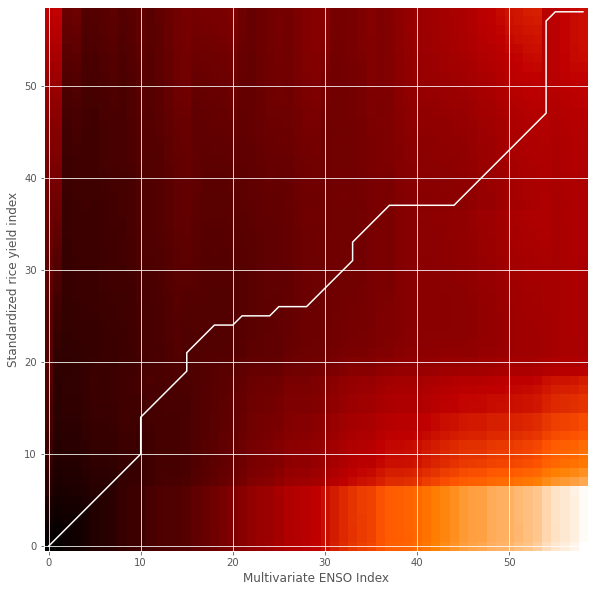

In [15]:
plt.figure(figsize=(10, 10))
plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gist_heat', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Multivariate ENSO Index')
plt.ylabel('Standardized rice yield index')
plt.savefig('./figures/fig3.eps')